### __VAISHNAVI PRAKASH KALGUTKAR__<br>
### __THE SPARKS FOUNDATION__<br>
### __Computer Vision and Internet of Things__ <br>
### __Task 2:Color Identification in Images__<br>
### __Problem statement__ :Implement an image color detector which identifies all the colors in an image or video.



In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# path of the image
img_path="sampleimage.jpeg"
#loading image from the specified path
img = cv2.imread(img_path)
#displaying dimension of img array
img.shape


(656, 875, 3)

In [4]:
#loading file containing color names along with their RGB and hex values
csv = pd.read_csv('colors.csv')
#displaying our color dataset
csv.head()




,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54


In [5]:
#Assigning name to the columns of the dataframe
csv.columns = ["color" , "color_name","hex","R","G","B"]
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54


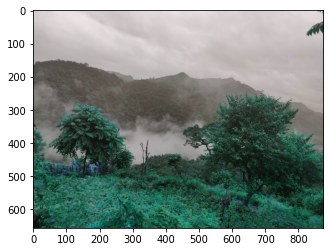

In [6]:
#displaying image using matplotlib
plt.imshow(img)

By default opencv reads  image in BGR colorspace. To view actual image We convert it to RGB colorspace using cvtcolor method 

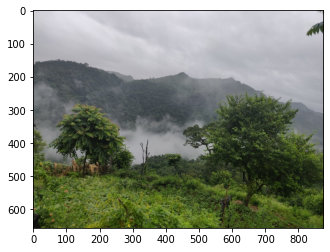

In [7]:
#moving from BGR colorspace to RGB 
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(image)


Histogram quantifies the number of pixels for each intensity value

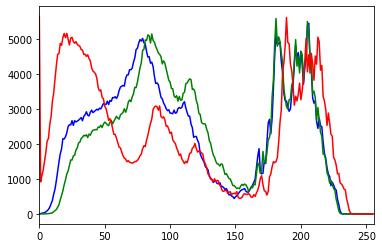

In [8]:
#RGB Histogram
color=('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image],[channel],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.show()

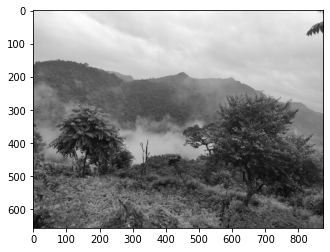

In [9]:
#displaying the image in gray scale
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')


Displaying dominant color of the image<br>KMeans algorithm will create clusters of colors and these will be our top colors in the image. KMeans takes input of two dimensions so the Numpy's reshape function is used to reshape the image data 

In [10]:
#displaying dominant colors from the image
import sklearn.cluster as cluster

height, width, dim = img.shape
#Reshaping the image data
img_vec = np.reshape(img, [height * width, dim] )
#cluster creation based on the  supplied count
kmeans = cluster.KMeans(n_clusters=3,init='k-means++')
#getting the kmeans labels by fitting and predicting on the image
kmeans.fit( img_vec )


KMeans(n_clusters=3)

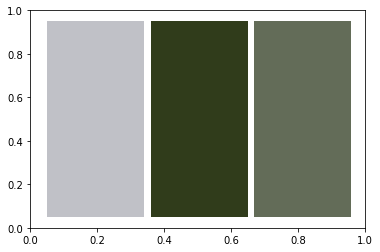

In [11]:

import matplotlib.patches as patches
#count cluster pixels,order clusters by cluster size
unique_l, counts_l = np.unique(kmeans.labels_, return_counts=True)
sort_idx = np.argsort(counts_l)

sort_idx = sort_idx[::-1]

fig = plt.figure()

ax = fig.add_subplot(111)
x_from = 0.05
for cluster_center in kmeans.cluster_centers_[sort_idx]:
    ax.add_patch(patches.Rectangle( (x_from, 0.05), 0.29, 0.9, alpha=None,
                                    facecolor='#%02x%02x%02x' % (int(cluster_center[2]), int(cluster_center[1]),int( cluster_center[0]) ) ) )
    x_from = x_from + 0.31

plt.show()

Detecting Color in the image with a double click on a particular point of the image

In [12]:
#intializing
clicked = False
r = g = b = xpos =ypos =0

In [13]:
#calculating minimum distance to get color name
def getColorName(R,G,B):
    minimum =40000
    for i in range(len(csv)):
        d= abs(R- int(csv.loc[i,"R"])) + abs(G - int(csv.loc[i,"G"]) + abs(B- int(csv.loc[i,"B"])))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname     

In [14]:
#function to get x,y coordinates of mouse double click
def draw_function(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos,clicked
        clicked=True
        xpos=x
        ypos=y
        b,g,r = img[y,x]
        b= int(b)
        g = int(g)
        r = int(r)

In [16]:
#creating window to display the input image
cv2.namedWindow('color detection')
#to get the mouse event 
cv2.setMouseCallback('color detection',draw_function)
#displaying the image on window
while(1):
    cv2.imshow("color detection",img)
    if(clicked):
        cv2.rectangle(img,(20,20),(750,60),(b,g,r), -1)
        text = getColorName(r,g,b) + 'R='+str(r) + 'G='+ str(g) + 'B=' + str(b)
        #displaying the colorname and RGB values on window
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        if(r+g+b>=600):
            #for light colors displaying text in black color
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
    #condition to close window (press esc key)
    if cv2.waitKey(20) & 0xFF ==27:
        break
cv2.destroyAllWindows()